In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

%store -r dataset
X = dataset[0]
z_true = dataset[1]
X_pca = dataset[2]

In [2]:
gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42)

z_gmm = gmm.fit_predict(X_pca)

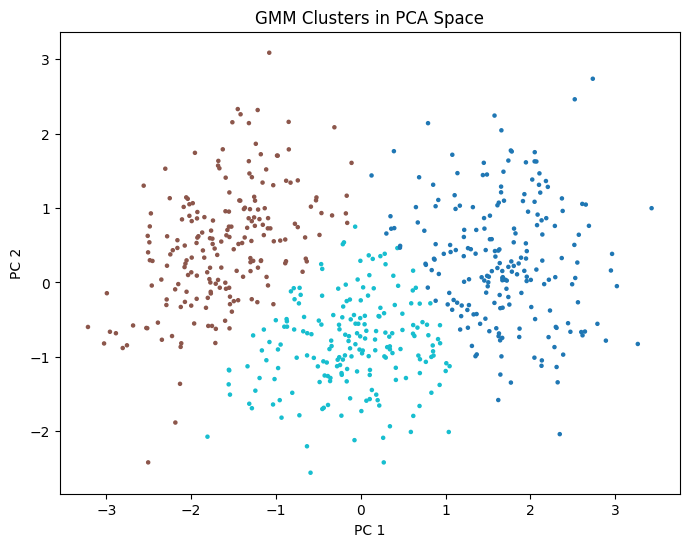

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=z_gmm, cmap='tab10', s=5)
plt.title('GMM Clusters in PCA Space')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [4]:
ari = adjusted_rand_score(z_true, z_gmm)
print(f'GMM ARI: {ari:.4f}')

GMM ARI: 0.8216


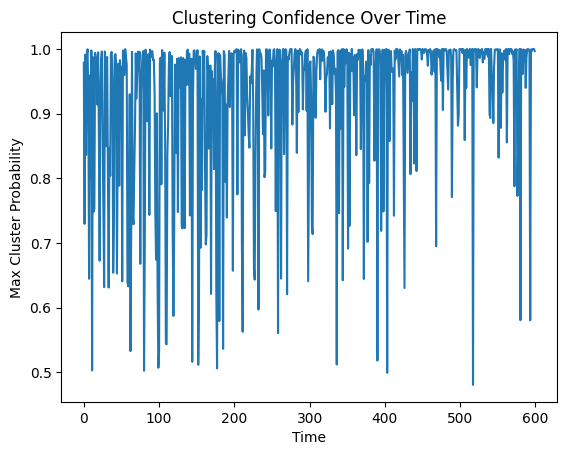

In [5]:
probs = gmm.predict_proba(X_pca)

max_prob = probs.max(axis=1)
plt.plot(max_prob)
plt.xlabel('Time')
plt.ylabel('Max Cluster Probability')
plt.title('Clustering Confidence Over Time')
plt.show()

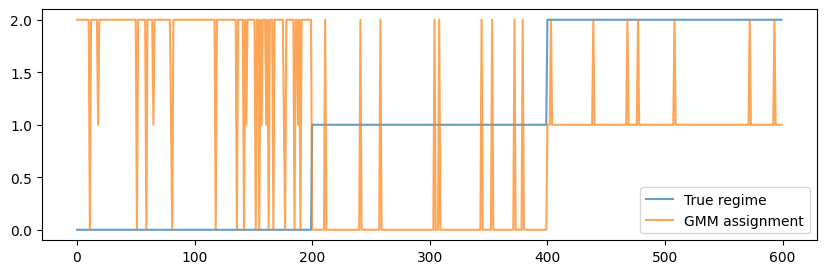

In [6]:
plt.figure(figsize=(10, 3))
plt.plot(z_true, label="True regime", alpha=0.7)
plt.plot(z_gmm, label="GMM assignment", alpha=0.7)
plt.legend()
plt.show()
